In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headphones_df = pd.read_csv('data/headphones.csv')
scale_df = pd.read_csv('data/weight+scale.csv')

In [3]:
headphones_df.head()

,asin,name,brand,list_price,buy_price,prime_price,rating,count,product_description,shipper,seller,category,url
0,B08SBSP3JY,"Classroom Headphones Bulk 5 Pack, Student On E...",Brand Sonitum,NaN,37.97,NaN,4.6,"2,263","About this item\nAMAZING SOUND, AT BULK RATES-...",Amazon,Rely On Us,\nOn-Ear Headphones,https://www.amazon.com/gp/slredirect/picassoRe...
1,B0BP6QFPP6,"Uliptz Wireless Bluetooth Headphones, 65H Play...",Brand Uliptz,NaN,26.99,19.99,4.4,"4,756",About this item\nHIGH FIDELITY AUDIO - Uliptz ...,Amazon,Uliptz Direct,\nOver-Ear Headphones,https://www.amazon.com/gp/slredirect/picassoRe...
2,NaN,Apple EarPods Headphones with Lightning Connec...,Brand Apple,29.0,17.97,NaN,4.6,"196,679","About this item\nUnlike traditional, circular ...",Amazon.com,Amazon.com,NaN,https://www.amazon.com/Apple-EarPods-Lightning...
3,NaN,Apple EarPods Headphones with Lightning Connec...,Brand Apple,29.0,17.97,NaN,4.6,"196,679","About this item\nUnlike traditional, circular ...",Amazon.com,Amazon.com,NaN,https://www.amazon.com/Apple-EarPods-Lightning...
4,B09XV4XV7T,ELECDER i45 On-Ear Headphones with Microphone ...,Brand ELECDER,NaN,14.99,9.99,4.5,"1,256",About this item\nImmersive Hi-Fi Stereo Bass B...,Amazon,ElecderDirect,\nOver-Ear Headphones,https://www.amazon.com/Elecder-i45-Ear-Headpho...


In [28]:
headphones_df.count()

asin                   543
name                   560
brand                  555
list_price             283
buy_price              548
prime_price             54
rating                 548
count                  548
product_description    560
shipper                553
seller                 553
category               545
url                    560
dtype: int64

Change string values to float and remove ',' in the strings

In [15]:
def format_price(x):
    x = str(x)
    x = x.replace(",", "")
    return float(x)

def format_rating(x):
    x = str(x)
    x = x.replace(" ", ".")
    x = x.replace("o", "0")
    return float(x)
    
headphones_df['buy_price'] = headphones_df['buy_price'].apply(lambda x: format_price(x))
headphones_df['rating'] = headphones_df['rating'].apply(lambda x: format_rating(x))

In [16]:
avg_price = headphones_df['buy_price'].mean()
print("The average price is:", avg_price)
avg_rating = headphones_df['rating'].mean()
print("The average rating is:", avg_rating)

The average price is: 50.13839416058433
The average rating is: 4.391240875912413


In [9]:
headphones_df['buy_price']

0      37.97
1      26.99
2      17.97
3      17.97
4      14.99
       ...  
555    14.99
556    29.99
557    99.00
558    19.85
559    36.99
Name: buy_price, Length: 560, dtype: object

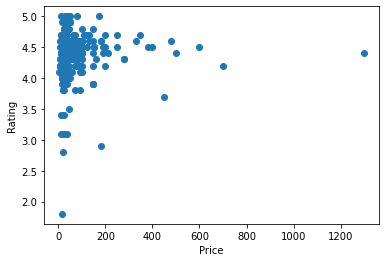

In [17]:
# Assuming the ratings are in a column called "rating" and the prices are in a column called "price"
plt.scatter(headphones_df['buy_price'], headphones_df['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [22]:
#could experiment with taking out the "about this item"
def format_description(x):
    x = str(x).lower()
    x = x.lower()
    return x

headphones_df['product_description'] = headphones_df['product_description'].apply(lambda x: format_description(x))

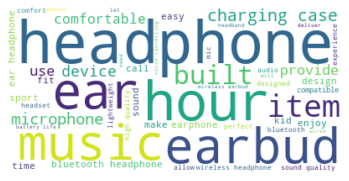

In [23]:
from wordcloud import WordCloud

# Assuming the product descriptions are in a column called "description"
text = " ".join(desc for desc in headphones_df.product_description)
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
count = 0
for i in headphones_df['product_description']:
    if 'item' in i:
        count += 1

In [27]:
count

555

In [29]:
headphones_df.brand.unique()

array(['Brand Sonitum', 'Brand Uliptz', 'Brand Apple', 'Brand ELECDER',
       'Brand DIUARA', 'Brand CALCINI', 'Brand INFURTURE', 'Brand TAGRY',
       'Brand Orancu', 'Brand Ordtop', 'Brand fojep', 'Brand sephia',
       'Brand Beats', 'Brand NIVAVA', 'Brand MSURTY', 'Brand kurdene',
       'Brand MOZOTER', 'Brand ASTRO Gaming', 'Brand Logitech',
       'Brand Perytong', nan, 'Brand occiam', 'Brand Sony', 'Brand JBL',
       'Brand RORSOU', 'Brand Tuitager', 'Brand LWZCAM', 'Brand BERIBES',
       'Brand Soundcore', 'Brand OneOdio', 'Brand kirababy',
       'Brand WATAHATIC', 'Brand noot products', 'Brand Betron',
       'Brand Skullcandy', 'Brand PSIER', 'Brand KVIDIO', 'Brand Srhythm',
       'Brand CTEX', 'Brand LAKKA', 'Brand Amazon Basics', 'Brand Nimizo',
       'Brand Rayhontech', 'Brand OMK', 'Brand FIFINE',
       'Brand SoundMAGIC', 'Brand Bose', 'Brand PURERINA', 'Brand EHEK',
       'Brand GNMN', 'Brand LORELEI', 'Brand HIFIMAN', 'Brand CXK',
       'Brand CAPOXO', 'Brand